In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    OrdinalEncoder, 
    TargetEncoder,
    StandardScaler
)

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lgbmboost import LGBMRegressor


In [ ]:
pip install xgboost lightgbm catboost

In [7]:
path = '/Users/verakabanova/foldeer_name/Insurance_Kaggle/insurance.csv'

In [8]:
df = pd.read_csv(path)

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


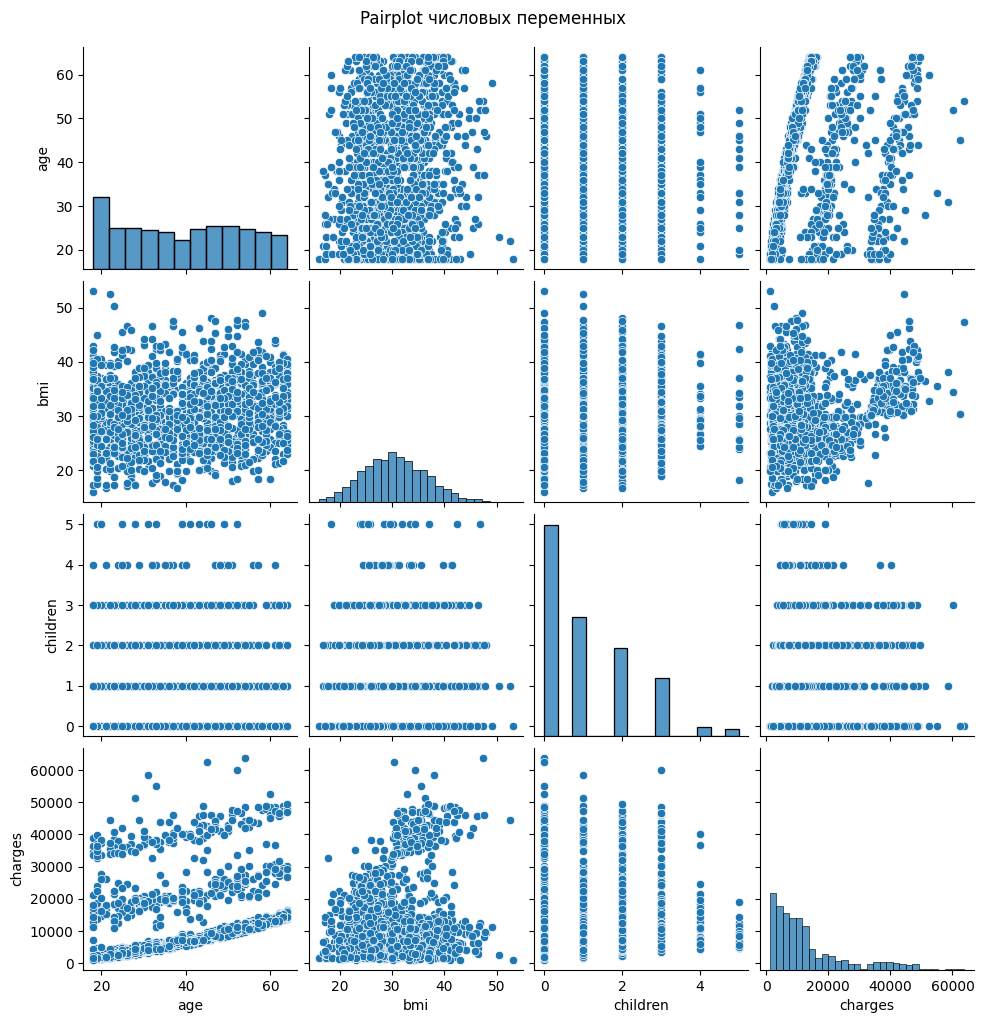

In [18]:
# Парный график для числовых переменных
sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
plt.suptitle('Pairplot числовых переменных', y=1.02)
plt.show()

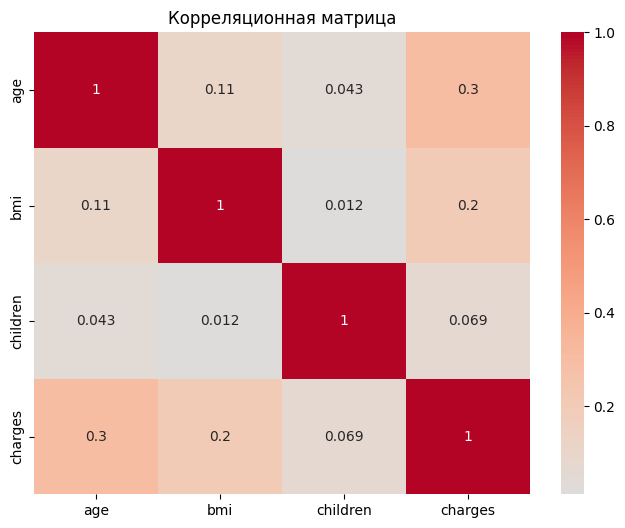

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

In [21]:
df.isnull().sum()

age         1
sex         0
bmi         1
children    1
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df.shape

(1338, 7)

In [25]:
df = df.dropna()

In [26]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
df.shape

(1335, 7)

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [29]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

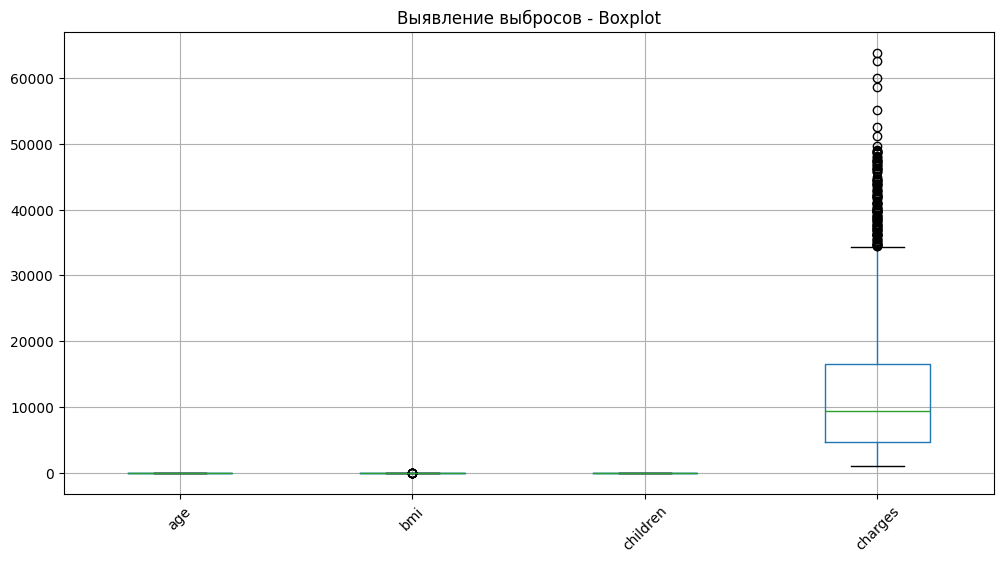

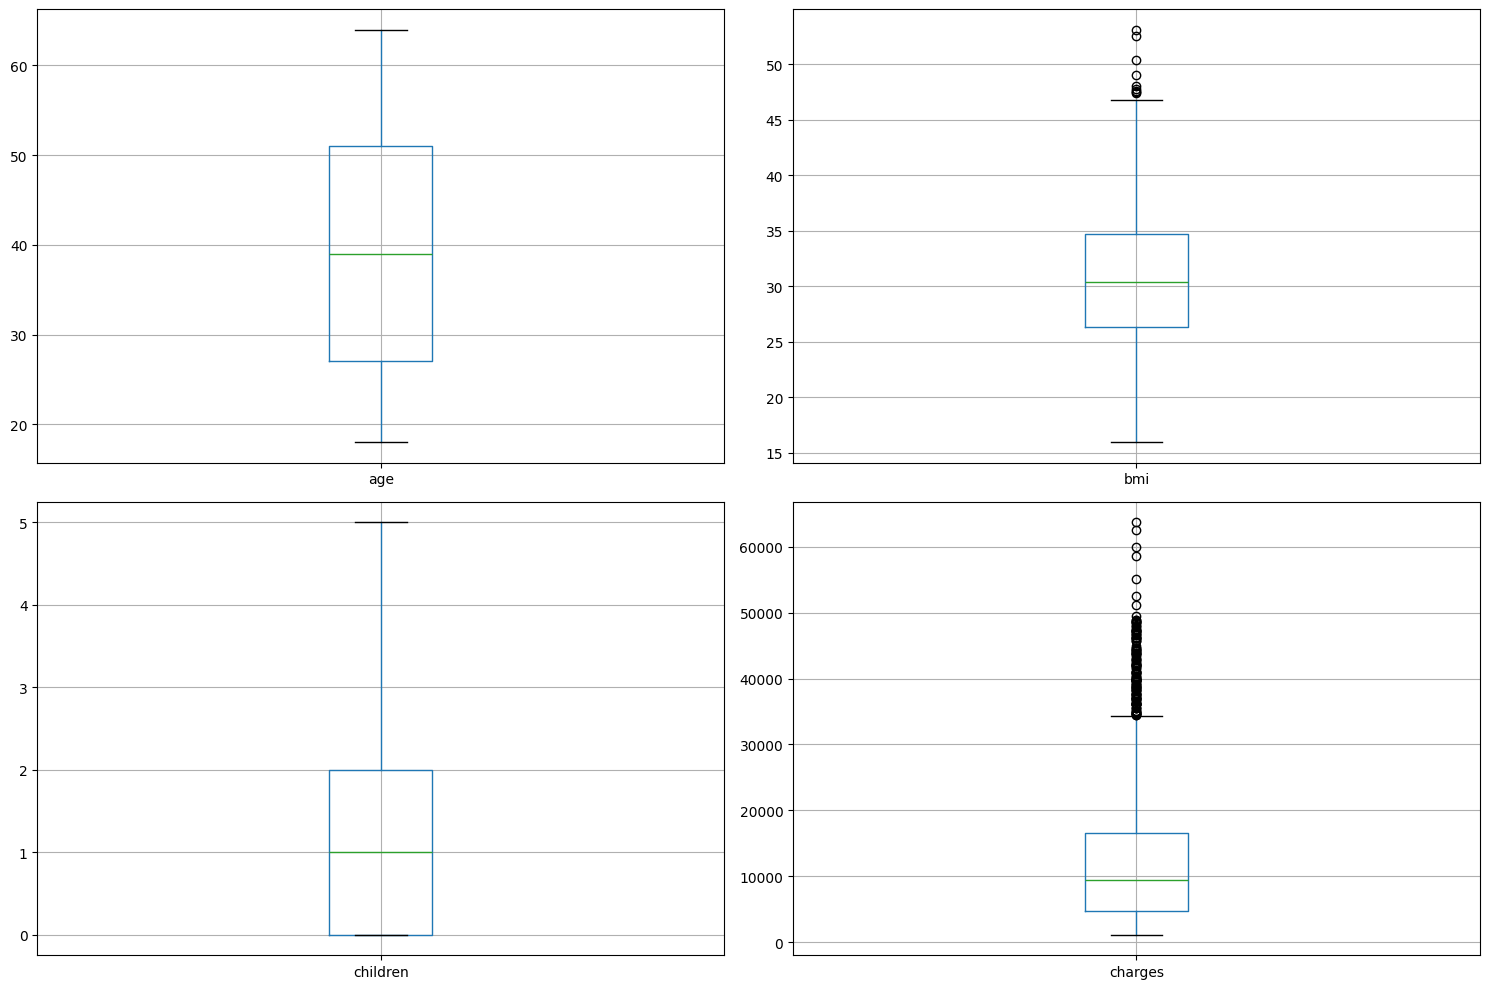

In [30]:
# Boxplot для всех числовых колонок
plt.figure(figsize=(12, 6))
df.select_dtypes(include=['number']).boxplot()
plt.title('Выявление выбросов - Boxplot')
plt.xticks(rotation=45)
plt.show()

# Или для отдельных колонок
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
df.boxplot(column='age', ax=axes[0,0])
df.boxplot(column='bmi', ax=axes[0,1])
df.boxplot(column='children', ax=axes[1,0])
df.boxplot(column='charges', ax=axes[1,1])
plt.tight_layout()
plt.show()

In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [54]:
X = df.drop('charges', axis=1)
y = df['charges']

In [55]:
X.head()

,age,sex,bmi,children,smoker,region
0,19.0,female,27.900,0.0,yes,southwest
1,18.0,male,33.770,1.0,no,southeast
2,28.0,male,33.000,3.0,no,southeast
3,33.0,male,22.705,0.0,no,northwest
4,32.0,male,28.880,0.0,no,northwest


In [56]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [57]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist

In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop='first', sparse_output=False), ['sex', 'region']),
        ('label', OrdinalEncoder(),['smoker']),
        ('numeric', StandardScaler(), ['age', 'bmi', 'children'])
    ], remainder='passthrough',
    verbose_feature_names_out=False
)

print('Пайплайн создан')

Пайплайн создан


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
preprocessor.fit(X_train, y_train)
print("Модель успешно обучена!")

Модель успешно обучена!


In [60]:
y_pred = preprocessor.predict(X_test)

AttributeError: 'ColumnTransformer' object has no attribute 'predict'

In [53]:
X.head()

,age,sex,bmi,children,smoker,region
0,19.0,female,27.900,0.0,yes,southwest
1,18.0,male,33.770,1.0,no,southeast
2,28.0,male,33.000,3.0,no,southeast
3,33.0,male,22.705,0.0,no,northwest
4,32.0,male,28.880,0.0,no,northwest
